In [ ]:
## What you see below is the weekly/monthly/daily S2 data which missing data has been 

In [263]:
import pandas as pd
import numpy as np 
import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from scipy import stats

In [264]:
S1 = pd.read_csv("Sensor1.csv")
S2 = pd.read_csv("Sensor2.csv")
S3 = pd.read_csv("Sensor3.csv")
S1 = S1.drop(columns=["Unnamed: 0"])
S2 = S2.drop(columns=["Unnamed: 0"])
S3 = S3.drop(columns=["Unnamed: 0"])
#S1.replace(0, np.nan, inplace=True)
#S2.replace(0, np.nan, inplace=True)
#S3.replace(0, np.nan, inplace=True)
print("number of duplicate rows in sensor 1",S1.duplicated().sum())
print("number of duplicate rows in sensor 2",S2.duplicated().sum())
print("number of duplicate rows in sensor 3",S3.duplicated().sum())
S1 = pd.DataFrame.drop_duplicates(S1).reset_index()
S2 = pd.DataFrame.drop_duplicates(S2).reset_index()
S3 = pd.DataFrame.drop_duplicates(S3).reset_index()

number of duplicate rows in sensor 1 2190
number of duplicate rows in sensor 2 2190
number of duplicate rows in sensor 3 2190


In [265]:
S2_avg = S2.copy()
S2_avg["month"]=pd.to_datetime(S2_avg["UTC Datetime"]).dt.month
S2_avg["year"]=pd.to_datetime(S2_avg["UTC Datetime"]).dt.year
S2_month = S2_avg.groupby(['year','month'],as_index=False).mean()      
S2_month.head()


,year,month,index,countlineId,Pedestrian
0,2021,5,44.5,22995.0,1914.133333
1,2021,6,179.5,22995.0,2030.344444
2,2021,7,362.5,22995.0,1942.768817
3,2021,8,548.5,22995.0,1975.774194
4,2021,9,731.5,22995.0,1978.900000


In [266]:
S2_avg = S2.copy()
S2_avg["month"]=pd.to_datetime(S2_avg["UTC Datetime"]).dt.month
S2_avg["year"]=pd.to_datetime(S2_avg["UTC Datetime"]).dt.year
S2_avg["day"]=pd.to_datetime(S2_avg["UTC Datetime"]).dt.day
S2_day = S2_avg.groupby(['year','month','day'],as_index=False).mean()
S2_day = S2_day[(np.abs(stats.zscore(S2_day["Pedestrian"])) < 3)]
S2_day.head()

,year,month,day,index,countlineId,Pedestrian
0,2021,5,17,2.5,22995.0,1867.666667
1,2021,5,18,8.5,22995.0,1925.166667
2,2021,5,19,14.5,22995.0,2071.833333
3,2021,5,20,20.5,22995.0,1119.833333
4,2021,5,21,26.5,22995.0,1712.666667


In [267]:
S2_avg = S2.copy()
S2_avg["month"]=pd.to_datetime(S2_avg["UTC Datetime"]).dt.month
S2_avg["year"]=pd.to_datetime(S2_avg["UTC Datetime"]).dt.year
S2_avg["week"]=pd.to_datetime(S2_avg["UTC Datetime"]).dt.week
S2_week = S2_avg.groupby(['year','month','week'],as_index=False).mean()
S2_week = S2_week[(np.abs(stats.zscore(S2_week["Pedestrian"])) < 3)]
S2_week.head()

/var/folders/w_/ft1536ls3k3gvb2sks5dbg8h0000gn/T/ipykernel_13288/2287105339.py:4: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  S2_avg["week"]=pd.to_datetime(S2_avg["UTC Datetime"]).dt.week


,year,month,week,index,countlineId,Pedestrian
0,2021,5,20,20.5,22995.0,1813.833333
1,2021,5,21,62.5,22995.0,1973.690476
2,2021,5,22,86.5,22995.0,2199.333333
3,2021,6,22,107.5,22995.0,2108.416667
4,2021,6,23,146.5,22995.0,2013.285714


In [268]:
def OLS(S1,S2,S3):
    train_S2=S2.loc[S2["Pedestrian"]!=0]
    train_S1=S1.loc[S2["Pedestrian"]!=0]
    train_S3=S3.loc[S2["Pedestrian"]!=0]
    train = {"S1":np.array(train_S1["Pedestrian"]),
           "S3":np.array(train_S3["Pedestrian"])}
    train = pd.DataFrame(train)
    test_S2=S2.loc[S2["Pedestrian"]==0]
    test_S1=S1.loc[S2["Pedestrian"]==0]
    test_S3=S3.loc[S2["Pedestrian"]==0]
    test = {"S1":np.array(test_S1["Pedestrian"]),
           "S3":np.array(test_S3["Pedestrian"])}
    test = pd.DataFrame(test)

    constant = sm.add_constant(train)
    model = sm.OLS(list(train_S2["Pedestrian"]),constant)
    result = model.fit()
    new_constant=sm.add_constant(test)
    pred = result.predict(new_constant)
    return pred
def month(S2):
    S2_avg = S2.copy()
    S2_avg["month"]=pd.to_datetime(S2_avg["UTC Datetime"]).dt.month
    S2_avg["year"]=pd.to_datetime(S2_avg["UTC Datetime"]).dt.year
    S2_month = S2_avg.groupby(['year','month'],as_index=False).mean()
    return S2_month
def week(S2):
    S2_avg = S2.copy()
    S2_avg["month"]=pd.to_datetime(S2_avg["UTC Datetime"]).dt.month
    S2_avg["year"]=pd.to_datetime(S2_avg["UTC Datetime"]).dt.year
    S2_avg["week"]=pd.to_datetime(S2_avg["UTC Datetime"]).dt.week
    S2_week = S2_avg.groupby(['year','month','week'],as_index=False).mean()
    return S2_week
def day(S2):
    S2_avg = S2.copy()
    S2_avg["month"]=pd.to_datetime(S2_avg["UTC Datetime"]).dt.month
    S2_avg["year"]=pd.to_datetime(S2_avg["UTC Datetime"]).dt.year
    S2_avg["day"]=pd.to_datetime(S2_avg["UTC Datetime"]).dt.day
    S2_day = S2_avg.groupby(['year','month','day'],as_index=False).mean()
    return S2_day
def miss_value(S2,pred):
    miss_value = S2.loc[S2["Pedestrian"]==0]
    pred.index = miss_value.index
    miss_value = S2.loc[S2["Pedestrian"]==0]
    for i in range(len(S2)):
        if S2["Pedestrian"][i]==0:
            S2["Pedestrian"][i]= pred[i]
    return S2

### OLS Monthly S2

/Users/jiang/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


,year,month,index,countlineId,Pedestrian
0,2021,5,44.5,22995.0,1914.133333
1,2021,6,179.5,22995.0,2030.344444
2,2021,7,362.5,22995.0,1942.768817
3,2021,8,548.5,22995.0,1975.774194
4,2021,9,731.5,22995.0,1978.900000


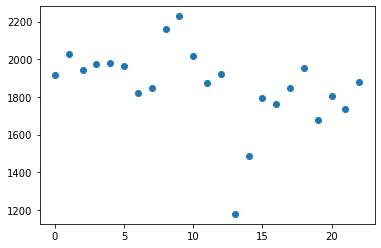

In [278]:
S1_month = month(S1)
S3_month = month(S3)
p = OLS(S1_month,S2_month,S3_month)
new_S2month = miss_value(S2_month,p)
new_S2month = new_S2month[(np.abs(stats.zscore(new_S2month["Pedestrian"])) < 3)]
plt.scatter(np.arange(len(new_S2month)),new_S2month["Pedestrian"])
new_S2month.head()

### OLS Weekly S2

/var/folders/w_/ft1536ls3k3gvb2sks5dbg8h0000gn/T/ipykernel_13288/1546264049.py:31: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  S2_avg["week"]=pd.to_datetime(S2_avg["UTC Datetime"]).dt.week
/Users/jiang/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


,year,month,week,index,countlineId,Pedestrian
0,2021,5,20,20.5,22995.0,1813.833333
1,2021,5,21,62.5,22995.0,1973.690476
2,2021,5,22,86.5,22995.0,2199.333333
3,2021,6,22,107.5,22995.0,2108.416667
4,2021,6,23,146.5,22995.0,2013.285714


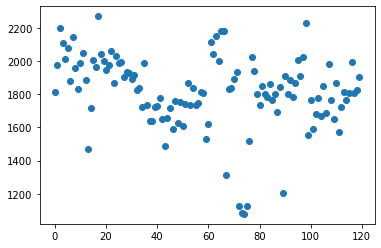

In [279]:
S1_week = week(S1)
S3_week = week(S3)
p = OLS(S1_week,S2_week,S3_week)
new_S2week = miss_value(S2_week,p)
new_S2week = new_S2week[(np.abs(stats.zscore(new_S2week["Pedestrian"])) < 3)]
plt.scatter(np.arange(len(new_S2week)),new_S2week["Pedestrian"])
new_S2week.head()

### OLS Daily S2

/Users/jiang/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


,year,month,day,index,countlineId,Pedestrian
0,2021,5,17,2.5,22995.0,1867.666667
1,2021,5,18,8.5,22995.0,1925.166667
2,2021,5,19,14.5,22995.0,2071.833333
3,2021,5,20,20.5,22995.0,1119.833333
4,2021,5,21,26.5,22995.0,1712.666667


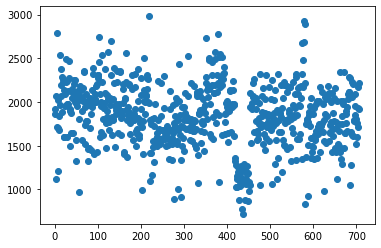

In [280]:
S1_day = day(S1)
S3_day = day(S3)
p = OLS(S1_day,S2_day,S3_day)
new_S2day = miss_value(S2_day,p)
new_S2day = new_S2day[(np.abs(stats.zscore(new_S2day["Pedestrian"])) < 3)]
plt.scatter(np.arange(len(new_S2day)),new_S2day["Pedestrian"])
new_S2day.head()

### OLS S2 (whole data)

/Users/jiang/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


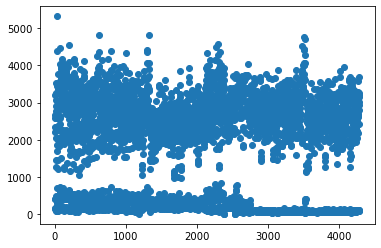

In [281]:
p = OLS(S1,S2,S3)
new_S2day = miss_value(S2,p)
new_S2day = new_S2day[(np.abs(stats.zscore(new_S2day["Pedestrian"])) < 3)]
plt.scatter(np.arange(len(new_S2day)),new_S2day["Pedestrian"])